In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as smm
import sklearn.metrics as skm
from sklearn.metrics import mean_squared_error
# import mlxtend as mx
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [2]:
# pip install mlxtend

# Question 3

          AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
S2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
S3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
S4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
S5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
S6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   

           S4        S5        S6  
AGE  0.203841  0.270774  0.301731  
SEX  0.332115  0.149916  0.208133  
BMI  0.413807  0.446157  0.388680  
BP   0.2

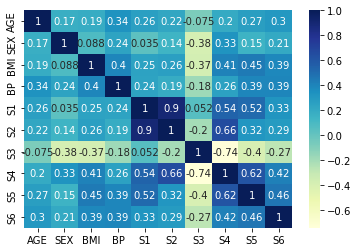

In [3]:
diabetes = pd.read_excel("Diabetes_Data.xlsx") #reading the values in the dataset
df = pd.DataFrame(diabetes)
mat = df.corr()
# print(mat)
# # print(diabetes)
x = pd.DataFrame(diabetes[['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6']]) #getting the predictor variables 
matt = x.corr() #finding the correlation estimates 
print(matt)

y = diabetes['Y']
# mat = np.corrcoef(x,y)
dataplot = sb.heatmap(matt, cmap="YlGnBu", annot=True) #plotting the heatmap
  
# displaying heatmap
mp.show()

In [4]:
x=smm.add_constant(x) #adding a constant 
model1 = smm.OLS(y,x).fit() #fitting the model 
model1.summary() #summary of the model 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           3.83e-62
Time:                        16:44:24   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -334.5671     67.455     -4.960      0.000    -467.148    -201.986
AGE           -0.0364      0.217     -0.168      0.867      -0.463       0.390
SEX          -22.8596      5.836     -3.917      0.000     -34.330     -11.389
BMI            5.6030      0.717      7.813      0.000       4.194       7.012
BP             1.1168      0.225      4.958      0.000       0.674       1.560
S1            -1.0900      0.573     -1.901      0.058      -2.217       0.037
S2             0.7465      0.531      1.406      0.160      -0.297       1.790
S3             0.3720      0.782      0.475      0.635      -1.166       1.910
S4             6.5338      5.959      1.097      0.273      -5.178      18.245
S5            68.4831     15.670      4.370      0.000      37.685      99.282
S6             0.2801      0.273      1.025      0.306      -0.257       0.817
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                     7.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
ypred =model1.predict() #prediction 
skm.mean_squared_error(ypred,y) #mean squared error 

2859.6963475867506

In [6]:
diabetes.isnull().sum() #checking for null values 

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

In [7]:
model = LinearRegression() #calling the linear regression function 
sfs1 = sfs(model, k_features=6, forward=True, verbose=2, scoring='neg_mean_squared_error') # selecting the best variables using the forward selection feature 
sfs1 = sfs1.fit(x, y) #fitting the model for selection 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-11-08 16:44:24] Features: 1/6 -- score: -3903.0512513175213[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-11-08 16:44:24] Features: 2/6 -- score: -3220.166257955822[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-11-08 16:44:24] Features: 3/6 -- score: -3110.2068154533963[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [8]:
feat_names = list(sfs1.k_feature_names_) #getting the list of featured variables 
print(feat_names)

['SEX', 'BMI', 'BP', 'S1', 'S3', 'S5']


In [9]:
#fitting a model using only the selected variables 
selectedvar = diabetes[['BMI','BP','S3','S5','S1','SEX']] 
x=smm.add_constant(selectedvar) #adding a constant 
model2 = smm.OLS(y,x).fit() #fitting the model 
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     76.44
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           6.31e-65
Time:                        16:44:25   Log-Likelihood:                -2388.1
No. Observations:                 442   AIC:                             4790.
Df Residuals:                     435   BIC:                             4819.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -231.3560     36.272     -6.378      0.000    -302.647    -160.066
BMI            5.7941      0.705      8.216      0.000       4.408       7.180
BP             1.1301      0.216      5.221      0.000       0.705       1.556
S3            -0.8860      0.256     -3.454      0.001      -1.390      -0.382
S5            50.6473      7.001      7.234      0.000      36.887      64.407
S1            -0.1880      0.093     -2.024      0.044      -0.371      -0.005
SEX          -21.5895      5.760     -3.748      0.000     -32.911     -10.268
==============================================================================
Omnibus:                        1.259   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                1.250
Skew:                           0.042   Prob(JB):                        0.535
Kurtosis:                       2.753   Cond. No.                     3.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# making predictions  and finding accuracy 
ypred2=model2.predict()
skm.mean_squared_error(ypred2,y) #mean squared error 

2886.5827320399526

# Question 4

In [11]:
titanicdata = pd.read_csv("titanic3.csv") #reading the titanics data 
titanicdata

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [12]:
titanicdata.isnull().sum() #checking for null values 

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [13]:
# filling na values with average of the column
titanicdata['age'] = titanicdata['age'].fillna(titanicdata['age'].mean())
# titanicdata['cabin'] = titanicdata['cabin'].fillna(titanicdata['cabin'].mean())
# titanicdata['embarked'] = titanicdata['embarked'].fillna(titanicdata['embarked'].mean())
# titanicdata['boat'] = titanicdata['boat'].fillna(titanicdata['boat'].mean())
titanicdata['body'] = titanicdata['body'].fillna(titanicdata['body'].mean())
titanicdata['fare'] = titanicdata['fare'].fillna(titanicdata['fare'].mean())
titanicdata
# titanicdata['age']
# titanicdata['age'].isnull().sum()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,160.809917,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,113781,151.5500,C22 C26,S,11,160.809917,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.000000,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.000000,NaN
1305,3,0,"Zabour, Miss. Thamine",female,29.881138,1,0,2665,14.4542,NaN,C,NaN,160.809917,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.000000,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,NaN,C,NaN,160.809917,NaN


In [14]:
#calculating survival probability
count =0
for num in titanicdata['survived']:
#     print(num)
    if (num==1):
        count = count+1
prob_surv = count/len(titanicdata['survived'])
print(prob_surv)

0.3819709702062643


In [15]:
#probabilties of survival by class
count = 0
count1 = 0
count2 = 0
class_one = 0
class_two = 0
class_three = 0
for i in range(0,len(titanicdata),1):
    if (titanicdata['pclass'][i]==1):
        class_one = class_one+1
        if(titanicdata['survived'][i]==1):
            count = count+1
print("Prob of class 1:",count/class_one)
for i in range(0,len(titanicdata),1):
    if (titanicdata['pclass'][i]==2):
        class_two = class_two+1
        if(titanicdata['survived'][i]==1):
            count1 = count1+1
print("Prob of class 2",count1/class_two)
for i in range(0,len(titanicdata),1):
    if (titanicdata['pclass'][i]==3):
        class_three = class_three+1
        if(titanicdata['survived'][i]==1):
            count2 = count2+1
print("Prob of class 3",count2/class_three)
      


Prob of class 1: 0.6191950464396285
Prob of class 2 0.4296028880866426
Prob of class 3 0.2552891396332863


In [16]:
len(titanicdata)

1309

In [17]:
#prob by gender
female =0
male=0
t_male = 0
t_female = 0
for i in range(0,len(titanicdata),1):
    if (titanicdata['sex'][i]=='female'):
        t_female = t_female+1
        if(titanicdata['survived'][i]==1):
            female = female+1
print("Probabilty of survival for male: ",female/t_female)
for i in range(0,len(titanicdata),1):
    if (titanicdata['sex'][i]=='male'):
        t_male = t_male+1
        if(titanicdata['survived'][i]==1):
            male = male+1
print("Probabilty of survival for female: ",male/t_male)

Probabilty of survival for male:  0.7274678111587983
Probabilty of survival for female:  0.19098457888493475


In [18]:
#prob by age 
titanicdata['age'].max()
titanicdata['age'].min()
# for age in (titanicdata['age']):
#     print()

0.17

In [19]:
count = 0
count1 = 0
count2 = 0
class_one = 0
class_two = 0
class_three = 0
for i in range(0,len(titanicdata),1):
    if (titanicdata['age'][i] < 18):
        class_one = class_one+1
        if(titanicdata['survived'][i]==1):
            count = count+1
print("Probabilty for those under 18: ",count/class_one)
for i in range(0,len(titanicdata),1):
    if (18 >= titanicdata['age'][i] < 60):
        class_two = class_two+1
        if(titanicdata['survived'][i]==1):
            count1 = count1+1
print("Probabilty for those above 18",count1/class_two)
for i in range(0,len(titanicdata),1):
    if (titanicdata['age'][i] >= 60):
        class_three = class_three+1
        if(titanicdata['survived'][i]==1):
            count2 = count2+1
print("Probabilty for those above 60",count2/class_three)

Probabilty for those under 18:  0.525974025974026
Probabilty for those above 18 0.49222797927461137
Probabilty for those above 60 0.3


C:\Users\Farida Eleshin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

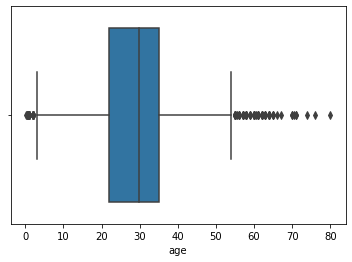

In [20]:
#checking for outliers
sb.boxplot(titanicdata['age'])

In [21]:

# replacing values
titanicdata['sex'].replace(['female', 'male'],
                        [1, 2], inplace=True)
x = titanicdata[['pclass', 'sex','age']]
y = titanicdata['survived'] 
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2,random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [22]:
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression(random_state=0)
modelLogistic.fit(x_train,y_train)
#print the regression coefficients
print("The intercept = ", modelLogistic.intercept_)

print("The coefficients of predictor variable = ", modelLogistic.coef_)

The intercept =  [-0.64577023]
The coefficients of predictor variable =  [[-0.84507962 -1.18851743 -0.32157331]]


In [23]:
#Make prediction for the test data
y_pred= modelLogistic.predict(x_test)
print(len(y_test),len(y_pred))

262 262


In [24]:
data = []

In [25]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[145  17]
 [ 36  64]]


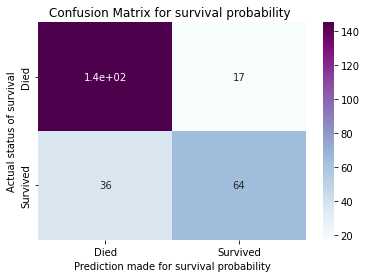

In [26]:
ax = sb.heatmap(ConfusionMatrix, annot=True, cmap= 'BuPu')
ax.set_title('Confusion Matrix for survival probability ');
ax.set_xlabel('Prediction made for survival probability')
ax.set_ylabel('Actual status of survival');
## Ticket labels – List must be in alphabetical order
ax.xaxis.set_ticklabels(['Died','Survived'])
ax.yaxis.set_ticklabels(['Died','Survived'])
## Display the visualization of the Confusion Matrix.
mp.show()

In [27]:
#Accuracy from confusion matrix
TP= ConfusionMatrix[1,1] #True positive
TN= ConfusionMatrix[0,0] #True negative
Total=len(y_test)
print("Accuracy from confusion matrix is ", (TN+TP)/Total)

Accuracy from confusion matrix is  0.7977099236641222


In [28]:
#Using statsmodels package to obtian the model
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.471324
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1047
Model:                          Logit   Df Residuals:                     1043
Method:                           MLE   Df Model:                            3
Date:                Tue, 08 Nov 2022   Pseudo R-squ.:                  0.2913
Time:                        16:44:26   Log-Likelihood:                -493.48
converged:                       True   LL-Null:                       -696.31
Covariance Type:            nonrobust   LLR p-value:                 1.306e-87
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6480      0.081     -8.014      0.000      -0.806      -0.490
x1            -0.8546      0.